<center><h1>"Can Fans Really Make a Difference?"</h1>
<br>
<h3>Using Natural Language Processing and Sentiment Analysis on Twitter tweets to determine if fans emotions before and during the match affect the outcomes.</h3>
<br>
<center><img src="http://www.rantsports.com/soccer/files/2014/06/2014-World-Cup-Brazil-Fans-Support-CONMEBOL.jpg"></center>
<br>
For our initial approach, we wanted to analyze emotions, such as joy, anger, surprised, before, during and after World Cup football matches but we would only find one good data set (which we still used as emotions.csv). Besides the lack of data available, there were only 40k observations with some classes [anger] only having a little over 100 observations. Since we know that anger is a normal emotion during sporting events (if your team is losing), we felt that it was better to aim for the polarity of sentiments: positive, negative and neutral.
<br>
<br>
Many current sentiment analysis only feature analyzing positive and negative analysis. This may be causing the lack of good neutral classed tweets. Through much searching around, I noticed that many neutral tweets are sometimes missclassified as positive or neutral, or vice versa. Our goal is to focus on the positive and negative tweets (since sports fans usually feel these emotions for big games) but classify these neutral tweets so we can remove them from our end goal of targeting emotions for matches. It is better to classify them and get rid of them, instead of purposely classifying them just to make things easier.

In [1]:
from __future__ import division
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import interactive
import seaborn as sns
sns.set(style='darkgrid')
import numpy as np
import pandas as pd
from IPython.display import display
import itertools

import warnings
warnings.filterwarnings("ignore")

import string

We will have two types of data sets, one type with the top emotions and another with sentiments based on positive, negative and neutral. I took the initiative to go through each csv and manually remove all columns besides text and sentiment to avoid time spent on simply cleaning the data sets. The only thing we will do is make sure they all have the same values of sentiments, since some are valued as numbers, different polarities of pos/neg, etc.
<br>
<br>
<b>Decription of each data set:</b>
<br>
<b>emotions:</b> data set with 40k observations of 13 emotions that we will map into positive, negative and neutral
<br>
<b>extra:</b> data set with random tweets and polarities
<br>
<b>deflegate:</b> data set featuring tweets in regards to the 2015 New England Patriots scandal. This is a good data set for our purpose since it is the only one with a sports subject.
<br>
<b>coachella:</b> data set featuring tweets in regards to Coachella 2015, a music concert in Southern California.
<br>
<b>product:</b> data set featuring tweets about product reviews. Used these to capture other types of tweets incase we gather tweet about products during the World Cup matches.
<br>
<b>other:</b> data set featuring tweets from 2009 and their polarities
<br>
<b>stanford:</b> data set featuring 1.6 million positive and negative tweets from 2009. Since these tweets are outdated, we will only take a sample from these just to give us more data to work with.

In [2]:
emotions = pd.read_csv('emotions.csv', encoding='utf-8')
extra = pd.read_csv('finalizedfull.csv')
deflegate = pd.read_csv('deflegate.csv', encoding="latin-1")
coachella = pd.read_csv('coachella.csv', encoding="latin-1")
product = pd.read_csv('products.csv', encoding="latin-1")
other = pd.read_csv('try2.csv', names=['text', 'sentiment'])
stanford = pd.read_csv('SA_reduced.csv', encoding="latin-1")

In [3]:
print("emotions : {}, extra : {}, deflegate : {}, coachella : {}, product : {}, other : {}, stanford : {}"
      .format(len(emotions), len(extra), len(deflegate), len(coachella), len(product), len(other), len(stanford)))

emotions : 40000, extra : 997, deflegate : 11814, coachella : 3846, product : 9092, other : 498, stanford : 1048575


##  Data Set Cleaning and Integration
Here we will go through each data set and make sure each sentiment has the values: "positive", "negative", or "neutral" depending of their values.

In [4]:
print("---Data Set Columns---")
print(emotions.columns)
print(extra.columns)
print(deflegate.columns)
print(coachella.columns)
print(other.columns)
print(stanford.columns) # we will have to clean stanford on here

---Data Set Columns---
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [5]:
def check_sents(df):
    '''function to print and plot distribution of sentiments for given data frame'''
    print(df.groupby('sentiment')['sentiment'].count())
    sns.countplot('sentiment', data=df)
    plt.xticks(rotation=45)

Here, we will map the emotions to their polarity. This is a good data set so we can work with it. Let us ensure sentiments are good for emotions.
<br>
<br>
<b>emotions :</b>

sentiment
negative    16063
neutral      8638
positive    15299
Name: sentiment, dtype: int64


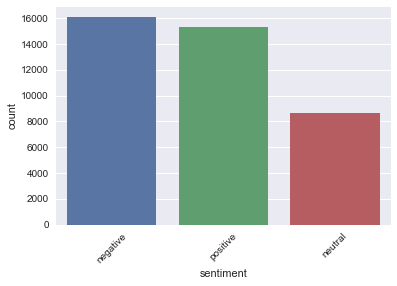

In [6]:
'''neutral = 'neutral'
positive = ['happiness', 'enthusiasm', 'fun', 'love' , 'relief', 'surprise']
negative = ['worry', 'sadness', 'anger', 'hate', 'boredom', 'empty']
'''

emotions['sentiment'].replace('happiness','positive',inplace=True)
emotions['sentiment'].replace('enthusiasm','positive',inplace=True)
emotions['sentiment'].replace('fun','positive',inplace=True)
emotions['sentiment'].replace('love','positive',inplace=True)
emotions['sentiment'].replace('relief','positive',inplace=True)
emotions['sentiment'].replace('surprise','positive',inplace=True)
emotions['sentiment'].replace('worry','negative',inplace=True)
emotions['sentiment'].replace('sadness','negative',inplace=True)
emotions['sentiment'].replace('anger','negative',inplace=True)
emotions['sentiment'].replace('hate','negative',inplace=True)
emotions['sentiment'].replace('boredom','negative',inplace=True)
emotions['sentiment'].replace('empty','negative',inplace=True)

check_sents(emotions)

<b>extra :</b>

[0 2 4]
sentiment
negative    377
neutral     239
positive    381
Name: sentiment, dtype: int64


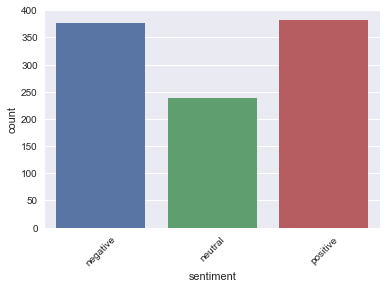

In [7]:
print(extra.sentiment.unique())

extra['sentiment'].replace(4,'positive',inplace=True)
extra['sentiment'].replace(2,'neutral',inplace=True)
extra['sentiment'].replace(0,'negative',inplace=True)

check_sents(extra)

<b>deflegate :</b>

['slightly positive' 'negative' 'positive' 'neutral' 'slighly negative'
 nan]
sentiment
negative    5775
neutral     3165
positive    2846
Name: sentiment, dtype: int64


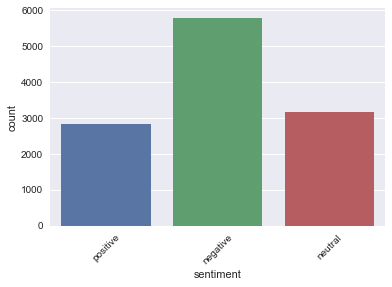

In [8]:
print(deflegate.sentiment.unique()) # here we also have nans

deflegate['sentiment'].replace('slightly positive','positive',inplace=True)
deflegate['sentiment'].replace('slightly negative','negative',inplace=True)
deflegate['sentiment'].replace('slighly negative','negative',inplace=True)

deflegate.dropna(axis=0, inplace=True)

check_sents(deflegate)

<b>coachella :</b>

['positive' 'neutral' 'negative' 'cant tell']
sentiment
negative     553
neutral      928
positive    2283
Name: sentiment, dtype: int64


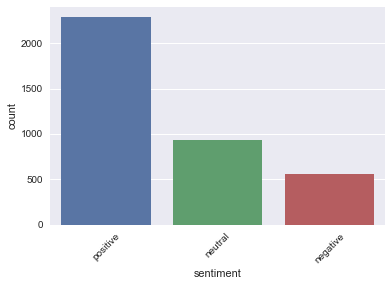

In [9]:
print(coachella.sentiment.unique()) # get rid of can't tell

coachella = coachella[coachella["sentiment"] != 'cant tell']

check_sents(coachella)

<b>product :</b>

['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]
sentiment
negative     570
positive    2978
Name: sentiment, dtype: int64


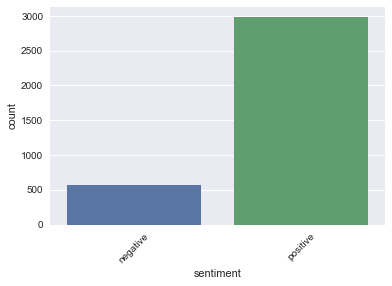

In [10]:
print(product.sentiment.unique()) # get rid of can't tell

product['sentiment'].replace('Positive emotion','positive',inplace=True)
product['sentiment'].replace('Negative emotion','negative',inplace=True)

to_drop = ['No emotion toward brand or product', "I can't tell"]
product = product[~product['sentiment'].isin(to_drop)]

check_sents(product)

<b>other :</b>

[4 0 2]
sentiment
negative    177
neutral     139
positive    182
Name: sentiment, dtype: int64


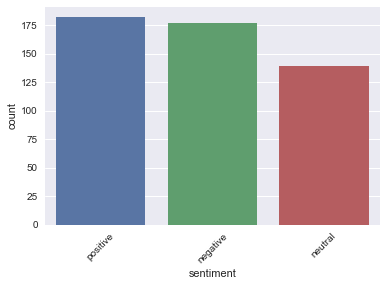

In [11]:
print(other.sentiment.unique()) # 4, 0, 2

other['sentiment'].replace(4,'positive',inplace=True)
other['sentiment'].replace(2,'neutral',inplace=True)
other['sentiment'].replace(0,'negative',inplace=True)

check_sents(other)

<b>Stanford :</b> Here we will take a sample from the Stanford data set.

[0 4]
sentiment
negative    20000
positive    20000
Name: sentiment, dtype: int64


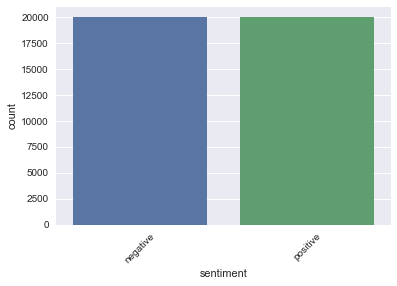

In [12]:
print(stanford.sentiment.unique())

stanford['sentiment'].replace(4,'positive', inplace=True)
stanford['sentiment'].replace(0,'negative', inplace=True)

stanford_neg = stanford[:20000] # get 20k negative tweets
stanford_pos = stanford[-20000:] # get 20k positive tweets
stanford_df = pd.DataFrame(columns=['text','sentiment'], index=None)
stanford_df = pd.concat([stanford_neg, stanford_pos], axis = 0)
stanford_df.reset_index()

check_sents(stanford_df)

Now we can combine them to make a full data frame.

sentiment
negative    43515
neutral     13109
positive    43969
Name: sentiment, dtype: int64


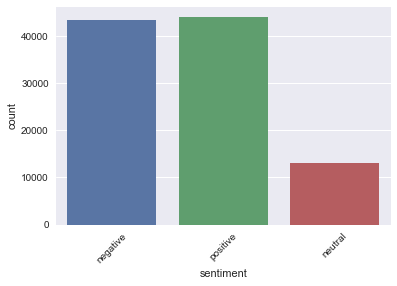

In [13]:
data = pd.DataFrame(columns=['text','sentiment'])
data = pd.concat([emotions, extra, deflegate, coachella, product, other, stanford_df], axis = 0)
labels = data['sentiment'].values # save

check_sents(data)

We can see that the distribution between positive and negative is similar while neutral trails behind by more than half. This should be fine since we can see that most tweets have some range of sentiment, but we can try bootstrapping the neutral tweets to create more observations.
<br>
## Preprocessing
### Creating Statistical Features
Now lets look at the top 20 most common words for each sentiment. I used my Professor Idafen Santana Peréz code for the plots and just made a few changes and turned it into a function.

In [14]:
from nltk.tokenize import WhitespaceTokenizer


def sentiment_word_analysis(dataset=data, col='text'):
    '''function to plot top words for each sentiment of respected data frame'''
    df = pd.DataFrame({col: dataset[col], "sentiment": dataset.sentiment})
    grouped = df.groupby(["sentiment"]).apply(lambda x: x[col].sum())
    grouped_df = pd.DataFrame({"sentiment": grouped.index, col: grouped.values})

    wpTokenizer = WhitespaceTokenizer()

    for index, text in enumerate(grouped_df[col]):
        pd.DataFrame(wpTokenizer.tokenize(text)).apply(pd.value_counts).head(20).plot(kind="bar")
        plt.title(grouped_df.sentiment[index], fontsize=20)
        plt.xticks(fontsize=15)
        interactive(True)
        plt.show()

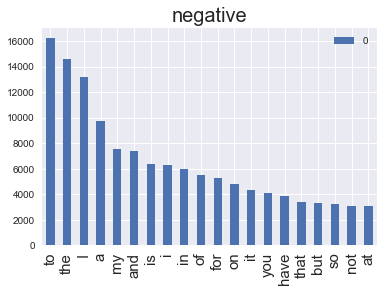

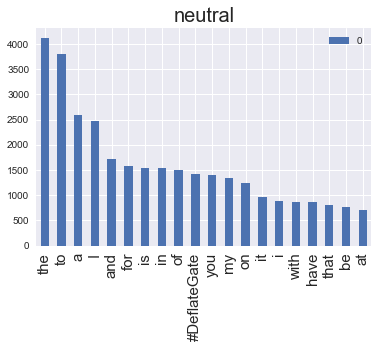

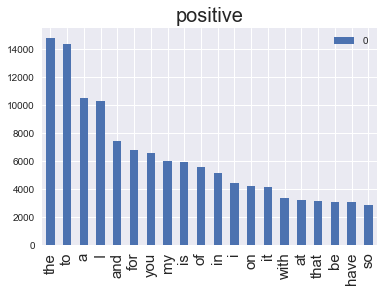

In [15]:
sentiment_word_analysis()

We can see that the top 20 words for each sentiment seem to be stop words and #Deflegate. Since we are doing sentiment analysis, it might not be a good idea to remove stop words, since some might affect the projection of the tweet. Instead, we will create our own list of words to remove. For now, let us do some feature engineering.
<br>
<br>
Let's create some new columns to show some information about the tweets. We will create columns for each tweets: character counts, word count, average word, stop word count, hashtag count and user tag count.

In [16]:
from nltk.corpus import stopwords


def tweet_stats(df):
    '''function to gather the original: character counts, word counts, average words per tweet, stop word counts,
    hashtag counts, and tag counts and saves them to the data frame, as well as print the numbers for each
    sentiment'''
    # character counts
    df['char_count'] = df['text'].str.len()

    # word counts
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

    # average words
    def avg_word(sentence):
        '''function to get the average word length for total length'''
        words = sentence.split()
        return (sum(len(word) for word in words) / len(words))
    df['avg_word'] = df['text'].apply(lambda x: avg_word(x))

    # stop words
    sw = stopwords.words('english')
    df['stopwords'] = df['text'].apply(lambda word: len([word for word in word.split() if word in sw]))

    # hashtags
    df['hashtags'] = df['text'].apply(lambda word: len([word for word in word.split() if word.startswith('#')]))

    # tags
    df['tags'] = df['text'].apply(lambda tag: len([tag for tag in tag.split() if tag.startswith('@')]))
    
tweet_stats(data)

char_avg_sent = data.groupby('sentiment').apply(lambda x: x['char_count'].mean())
print("char_avg_sent : {}".format(char_avg_sent))

word_avg_sent = data.groupby('sentiment').apply(lambda x: x['word_count'].mean())
print("word_avg_sent : {}".format(word_avg_sent))

avg_word_avg_sent = data.groupby('sentiment').apply(lambda x: x['avg_word'].mean())
print("avg_word_avg_sent : {}".format(avg_word_avg_sent))

sw_avg_sent = data.groupby('sentiment').apply(lambda x: x['stopwords'].mean())
print("sw_avg_sent : {}".format(sw_avg_sent))

hashtag_avg_sent = data.groupby('sentiment').apply(lambda x: x['hashtags'].mean())
print("hashtag_avg_sent : {}".format(hashtag_avg_sent))

tag_avg_sent = data.groupby('sentiment').apply(lambda x: x['tags'].mean())
print("tag_avg_sent : {}".format(tag_avg_sent))

char_avg_sent : sentiment
negative    80.894358
neutral     77.926615
positive    80.601742
dtype: float64
word_avg_sent : sentiment
negative    14.685143
neutral     12.690518
positive    14.445291
dtype: float64
avg_word_avg_sent : sentiment
negative    5.000989
neutral     5.621144
positive    5.164545
dtype: float64
sw_avg_sent : sentiment
negative    4.620568
neutral     3.755969
positive    4.271350
dtype: float64
hashtag_avg_sent : sentiment
negative    0.310766
neutral     0.564421
positive    0.329164
dtype: float64
tag_avg_sent : sentiment
negative    0.471860
neutral     0.579831
positive    0.601083
dtype: float64


In [17]:
data.head()

,text,sentiment,char_count,word_count,avg_word,stopwords,hashtags,tags
0,@tiffanylue i know i was listenin to bad habi...,negative,92,19,4.111111,8,0,1
1,Layin n bed with a headache ughhhh...waitin o...,negative,60,11,5.000000,4,0,0
2,Funeral ceremony...gloomy friday...,negative,35,3,11.000000,0,0,0
3,wants to hang out with friends SOON!,positive,36,7,4.285714,3,0,0
4,@dannycastillo We want to trade with someone w...,neutral,86,15,4.800000,6,0,1


We can see that neutral tweets tend to have around 8 less characters and 2 less words that both positive and negative. We can use this information for our model.
<br>
### Removing HTML decodings
We have some HTML decoding such as ‘&amp’,’&quot’,etc. Lets remove them.

In [18]:
data.iloc[6,0]

"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"

In [19]:
from bs4 import BeautifulSoup


def clean_HTML(text):
    '''function to clean HTML decoding'''
    text = BeautifulSoup(text, 'lxml')
    return text.get_text()

data['cleaned'] = data['text'].apply(clean_HTML)

In [20]:
data.iloc[200,0]

'@AlexanderGWhite daaammmnnnnn I do wish I was there.'

### Removing Users, Urls and Hashtags
Since each users individual username is not important, we can rid of them since we already created a column on how many users were tagged in the original tweet. We can also get rid of urls since they don't mean anything. Next we'll get rid of repetitions such as 'hurrrrrry' or 'hiiiiiii' since they really don't add too much value.

In [21]:
import re


def remove_usr(text):
    '''function to remove usernames'''
    text = re.sub(r"@(\w+)", "", text, flags=re.MULTILINE)
    return text

data['cleaned'] = data['cleaned'].apply(remove_usr)


def remove_url(text):
    '''function to remove urls'''
    text = re.sub(r"(http|https|ftp)://[a-zA-Z0-9\./]+", "", text, flags=re.MULTILINE)
    return text

data['cleaned'] = data['cleaned'].apply(remove_url)  

def remove_hashtag(text):
    '''function to remove hashtags'''
    text = re.sub(r"#", "", text, flags=re.MULTILINE)
    text = text.lower() # lowercase all
    return text

data['cleaned'] = data['cleaned'].apply(remove_hashtag) 

def replace_repeat(text):
    '''function to remove repeating letters, exclamations and question marks for any letter repeated more 
    than twice in a row'''
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = re.sub("\!+", "!", text)
    text = re.sub("\?+", "?", text)
    return text

data['cleaned'] = data['cleaned'].apply(replace_repeat)

In [22]:
data.iloc[200,8]

' daammnn i do wish i was there.'

### Emoticons
Emogis can show the emotion of the tweeter. Since the emogi objects were stripped when we loaded the data (it was having problems converting), we will convert the text emogis and emotion abbreviations (such as WOW) to their repected emotion intention.

In [23]:
# Emoticons borrowed from professor but I added some more
emotions = [('SMILE', [':-)', ':)', '(:', '(-:', '=)', '(=', ':p', ':))' ] ) ,
             ('LAUGH', [':-D', ':D', 'X-D', 'XD', 'xD', 'lol', 'lmao', 'woo', 'rofl', 
                          'haha', 'woohoo', 'haa', 'haahaa' ] ) ,
             ('LOVE', ['<3', ':\*', ':\*', 'muah'] ) ,
             ('WINK', [';-)', ';)', ';-D', ';D', '(;', '(-;' ] ) ,
             ('FROWN', [':-(', ':(', '(:', '(-:', ':/', '=(', ')=', ':-/', 'rip' ] ) ,
             ('CRY', [':,(', ':\'(', ':"(', ':((', '</3', ":'(" ] ) ,
             ('SHOCKED', [':-o', ':O' ] ) ,
             ('BLAH', ['blah', 'blahh' 'sigh']),
             ('SURPRISED', ['omg', 'omgg', 'woah', 'whoah', 'wow'])]

def escape_paren(arr):
    '''converts to more possible combinations of mouth character'''
    return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

def regex_union(arr):
    return '(' + '|'.join( arr ) + ')'

emotions_regex = [ (repl, re.compile(regex_union(escape_paren(regx))) ) for (repl, regx) in emotions ]
   
def insert_emogi(text):
    '''function to replace text emogis with their written emotions'''
    for (repl, regx) in emotions_regex :
        text = re.sub(regx, ' ' + repl + ' ', text)
    return text

data['cleaned'] = data['cleaned'].apply(insert_emogi)

In [24]:
data.iloc[230,8]

' oh no  i am always here  WINK   LOVE '

Since words that are in ALL CAPS tend to show more emotion, we want to keep these but lowercase words that are just uppercased by structure. So we will transform the unwanted capital letters to reduce the amount of words.

### Contractions
Next, we will clean up the most common types of contractions so when we clean for punctuation, words will not lose their meaning. We aimed for the most common contractions and also wanted to empahasize on the negative ones, even including the word without the apostraphe since many tweets are informal.

In [25]:
data.iloc[250,8]

"chillin with the roomies. can't wait for the zombie clwn cr. its gonna be 6-8 weeks"

In [26]:
contractions_dic = {"isn't":"is not", "isnt":"is not", "aren't":"are not", "arent":"are not", "wasn't":"was not", 
                    "wasnt":"was not","weren't":"were not", "werent":"were not","haven't":"have not",
                    "havent":"have not","hasn't":"has not","hasnt":"has not","hadn't":"had not","hadnt":"had not",
                    "won't":"will not","wont":"will not","wouldn't":"would not","wouldnt":"would not", 
                    "don't":"do not","dont":"do not", "doesn't":"does not","doesnt":"does not","didn't":"did not",
                    "didnt":"did not","can't":"can not","cant":"can not", "couldn't":"could not",
                    "couldnt":"could not","shouldn't":"should not","shouldnt":"should not", "mightn't":"might not", 
                    "mightnt":"might not","mustn't":"must not","mustnt":"must not", "i'm":"i am","what's":"what is",
                    "we'll": "we will","i've":"i have","we're":"we are", "we've":"we have", "you've": "you have",
                    "they've":"they have","ain't":"did not","could've":"could have","daren't":"dare not",
                    "everyone's":"everyone is","finna":"fixing to","gimme":"give me","gonna":"going to",
                    "he's":"he is","he've":"he have","how'd":"how did","how'll":"how will","how're":"how are",
                    "how's":"how is","i'd":"i would","i'll":"i will","it'll":"it will","it's":"it has",
                    "let's":"let us","ma'am":"madam","may've":"may have","might've":"might have","needn't":"need not",
                    "o'clock":"of the clock","ol'":"old","oughtn't":"ought not","shan't":"shall not",
                    "she'd":"she would","she'll":"she will","she's":"she is","should've":"should have",
                    "somebody's":"somebody is","someone's":"someone is","that'll":"that will","that's":"that is",
                    "that'd":"that would","there'll":"there will","there's":"there is","they'd":"they would",
                    "they'll":"they will","they're":"they are","'tis":"it is","'twas":"it was","we'd":"we would",
                    "we'd":"we would have","we'll":"we will","we're":"we are","we've":"we have","what'd":"what did",
                    "when's":"when is","where's":"where is","who'd":"who would","who'll":"who will","who's":"who is",
                    "why'd":"why did","would've":"would have","y'all":"you all","you'd":"you would", 
                    "you'll":"you will","you're":"you are","you've":"you have","gotta":"got to","he'd":"he would",
                    "he'll":"he will","&":"and","im":"i am","ha":"has",'its':'it is','\'s':''}

contractions_pattern = re.compile(r'\b(' + '|'.join(contractions_dic.keys()) + r')\b')

def decontract(text):
    text = contractions_pattern.sub(lambda x: contractions_dic[x.group()], text)
    #text = text.strip(' ')
    return text

data['cleaned'] = data['cleaned'].apply(decontract)

###  Removing Slang
And now the most common slang, which is normal in tweets.

In [27]:
slang_dic = {"bout":"about","rmbr":"remember","learnt":"learned","tks":"thanks","u":"you","yu":"you",
             "chillin":"chilling","fk":"fuck","fuk":"fuck","fuucckk":"fuck","appt":"appointment","dam":"damn",
             "ht":"hate","jk":"just kidding","wtf":"what the fuck","WTF":"WHAT THE FUCK","u":"you",
             "listenin":"listening","n":"in","bc":"because","aa":"ah","bf":"boyfriend","gf":"girlfriend",
            "lmk":"let me know","bff":"bestfriend","wa":"was"}

slang_pattern = re.compile(r'\b(' + '|'.join(slang_dic.keys()) + r')\b')

def replace_slang(text):
    text = slang_pattern.sub(lambda x: slang_dic[x.group()], text)
    return text

data['cleaned'] = data['cleaned'].apply(replace_slang)

In [28]:
data.iloc[250,8]

'chilling with the roomies. can not wait for the zombie clwn cr. it is going to be 6-8 weeks'

### Adding TextBlob Polarity and Subjectivity

In [29]:
from textblob import TextBlob, Word


def tb_polarity(tweet):
    '''Utility function to classify the polarity of a tweet using textblob.'''
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

data['pol'] = data['cleaned'].apply(tb_polarity)


def tb_subjectivity(tweet):
    '''Utility function to classify the subjectivity of a tweet using textblob.'''
    analysis = TextBlob(tweet)
    return analysis.sentiment.subjectivity

data['subjectivity'] = data['cleaned'].apply(tb_subjectivity)

### Cleaning Punctuation
Lets do something similar for exclamations, questions and ellipsis since they are important for sentiment analysis. We can get rid of all the other punctuation.

In [30]:
def clean_punct(text):
    '''remove all punctuation except for exclamations, question marks, and ellipsis'''
    text = re.sub('!', ' EXCLAMATION', text) # convert exclamation marks
    text = re.sub('\?', ' QUESTION', text) # convert question marks
    text = re.sub('^...$', ' ELLIPSIS ', text) # convert ellipsis
    text = re.sub('^....$', ' ELLIPSIS ', text) # convert ellipsis
    text = re.sub('^.....$', ' ELLIPSIS ', text) # convert ellipsis
    text = re.sub("[^a-zA-Z]", " ", text) # better than the other
    text = re.sub(' +', ' ', text) # clear extra white spaces
    return text

data['cleaned'] = data['cleaned'].apply(clean_punct)

We have some tweets that were cleaned and now are blank since they only tagged a user, which will give us nothing so let's remove them

In [31]:
data.drop(data[data['cleaned'] == ""].index, inplace=True) # they are technically not null but have a white space

### Text Visualizations and Analysis
Originally, we planned on getting rid of stop words but since we will be using n-grams, it might affect the accuracy. Such as someone saying 'f#ck you' instead of just saying 'f#ck' which can be a completely different meaning. So instead, let us get rid of some words that are biased such as DeflateGate and Coachella since a lot of data comes from those data sets. We can check by seeing the most common and rarest words. Then we can start seeing which are important without the visual effects.

In [32]:
most_common = pd.Series(' '.join(data['cleaned']).split()).value_counts()[:50]
most_common.index

Index(['i', 'to', 'the', 'EXCLAMATION', 'a', 'is', 'you', 'it', 'not', 'and',
       'my', 'in', 'for', 'QUESTION', 'am', 'of', 'deflategate', 'on', 'have',
       'that', 'me', 'so', 'do', 'at', 'but', 'has', 'just', 'with', 'be',
       'are', 'LAUGH', 'this', 'was', 'can', 'will', 'up', 'day', 'all', 'now',
       'good', 'out', 'going', 'get', 'like', 'rt', 'coachella', 'no', 'about',
       'go', 'we'],
      dtype='object')

Normally, we would manually remove the rarest words to avoid noise but since we will put a limit on the TF IDF vectorizer, it will do it automatically. Here we can just take a look at the 50 rarest words (only one count).

In [33]:
rarest = pd.Series(' '.join(data['cleaned']).split()).value_counts()[-50:]
rarest.index

Index(['johnnie', 'pena', 'discussional', 'kittahs', 'rascals', 'carbide',
       'rahul', 'doddgy', 'interstate', 'becomming', 'fireftp', 'thumbnails',
       'recycler', 'gaffigan', 'splurging', 'fineass', 'giveusabreak', 'yow',
       'assignemtn', 'otherway', 'heeaavily', 'thaw', 'topfield', 'kiddnation',
       'storys', 'gubbe', 'growwn', 'topes', 'brandcenter', 'surry', 'harner',
       'tallent', 'thunb', 'klandike', 'sandown', 'kevick', 'spurr', 'esso',
       'notahater', 'strikeforchange', 'showerr', 'lymph', 'liddo', 'benih',
       'thebeat', 'indiscrimate', 'seos', 'fledermaus', 'spellingis',
       'antler'],
      dtype='object')

We will just get rid of some words that are common in the data set that focuses on a certain subject, such as the terms that will be mentioned a lot in DeflateGate and Coachella.

In [34]:
words2remove = ['deflategate','coachella','rt','tom brady','patriots','sxsw','deflate gate','coachella',
                'acdc','ac','afc','nfc','nfl','aapl']

data['cleaned'] = data['cleaned'].apply(lambda word: " ".join(word for word in word.split() if word not in words2remove))

Now let us visualize and see the top tokens for each sentiments and the totals.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
count_vec.fit(data.cleaned)

print("Total words : {}".format(len(count_vec.get_feature_names())))

pos_doc_matrix = count_vec.transform(data[data['sentiment'] == 'positive'].cleaned)
neg_doc_matrix = count_vec.transform(data[data['sentiment'] == 'negative'].cleaned)
neu_doc_matrix = count_vec.transform(data[data['sentiment'] == 'neutral'].cleaned)
document_matrix = count_vec.transform(data['cleaned'])
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg_tf = np.sum(neg_doc_matrix,axis=0)
neu_tf = np.sum(neu_doc_matrix,axis=0)
doc_tf = np.sum(document_matrix,axis=0)
pos = np.squeeze(np.asarray(pos_tf))
neg = np.squeeze(np.asarray(neg_tf))
neu = np.squeeze(np.asarray(neu_tf))
doc = np.squeeze(np.asarray(doc_tf))
term_freq_df = pd.DataFrame([pos,neg,neu,doc],columns=count_vec.get_feature_names()).transpose()
term_freq_df.columns = ['positive','negative','neutral','total']

term_freq_df.sort_values(by='total', ascending=False).head(10)

Total words : 49657


,positive,negative,neutral,total
to,15545,17463,4109,37117
the,16403,16073,4638,37114
exclamation,21227,12286,2712,36225
is,9517,10374,2639,22530
you,11421,6919,2419,20759
it,9261,9395,2092,20748
not,6348,12024,2129,20501
and,8260,8130,1914,18304
my,6824,8888,1580,17292
in,5836,6763,1753,14352


### Zipf's Law
According to Wikipedia, "Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table." (Wikipedia, 2018)
<br>
Now we can see the distribution of the top 100 tokens.

Text(0.5,1,'Top 100 tokens in tweets')

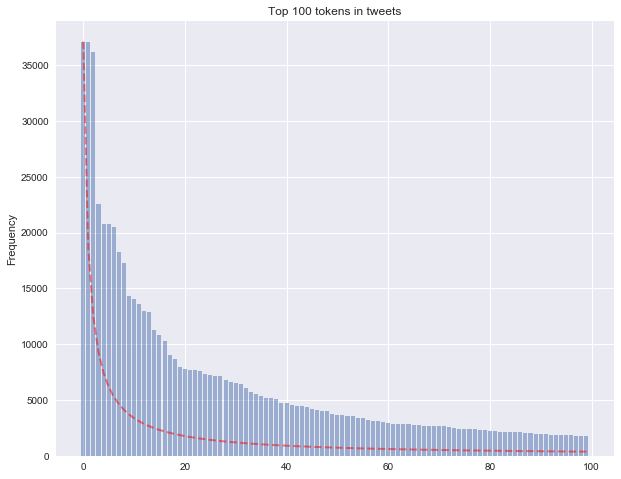

In [36]:
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:100], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 100 tokens in tweets')

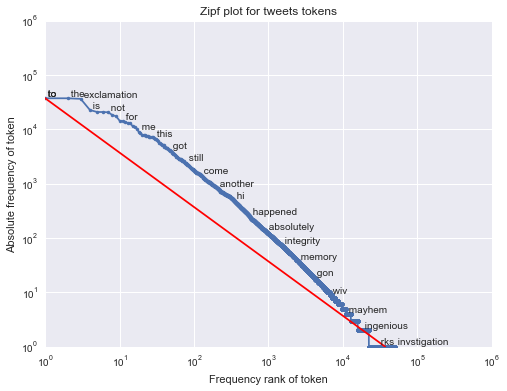

In [37]:
from pylab import *


counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5,1,'Negative Frequency vs Positive Frequency')

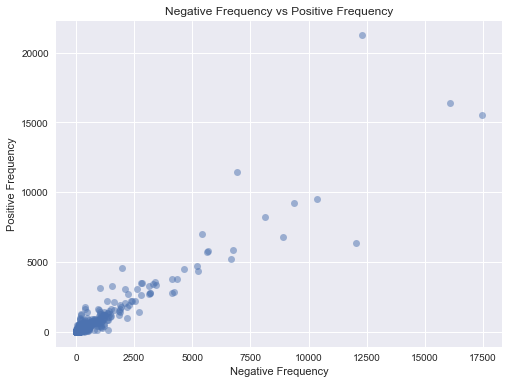

In [38]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

We can see that there is not much of a correlation between the frequency of positive and negative words.

### Tokenizing and Lemmatizing
Here we will use TextBlob to tokenize and lemmatize the text. I prefer TextBlob over nltk since it worked better and didn't cause errors when trying to vectorize it later.

In [39]:
def tokenize_text(text):
    '''function to tokenize text'''
    return TextBlob(text).words

data['cleaned'] = data['cleaned'].apply(tokenize_text)

# lemmatize
data['cleaned'] = data['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [40]:
data.head()

,text,sentiment,char_count,word_count,avg_word,stopwords,hashtags,tags,cleaned,pol,subjectivity
0,@tiffanylue i know i was listenin to bad habi...,negative,92,19,4.111111,8,0,1,i know i wa listening to bad habit earlier and...,-0.35,0.583333
1,Layin n bed with a headache ughhhh...waitin o...,negative,60,11,5.000000,4,0,0,layin in bed with a headache ughh waitin on yo...,0.00,0.000000
2,Funeral ceremony...gloomy friday...,negative,35,3,11.000000,0,0,0,funeral ceremony gloomy friday,0.00,0.000000
3,wants to hang out with friends SOON!,positive,36,7,4.285714,3,0,0,want to hang out with friend soon EXCLAMATION,0.25,0.100000
4,@dannycastillo We want to trade with someone w...,neutral,86,15,4.800000,6,0,1,we want to trade with someone who ha houston t...,0.00,0.000000


We can that the words are almost the same across each sentiment classified tweet.

### Clean Punctuation - Part 2
Punctuations don't seem to be really helping us in the text. Let us create some new column for each tweet if they contain it. The plan was to keep a count of how many time each punctuation text occurs and store it in a new column, but after thinking, it might not have any real effect. Such as 'I love you!' and 'I love you!!!!!!!!!!!' both are positive. The latter may have a higher polarity but we are just looking for the class values.

In [41]:
# exclamation
data['exclamation'] = data.cleaned.str.contains(r'EXCLAMATION')
data['question'] = data.cleaned.str.contains(r'QUESTION')
data['ellipsis'] = data.cleaned.str.contains(r'ELLIPSIS')

data['exclamation'] = data['exclamation'].astype(int)
data['question'] = data['question'].astype(int)
data['ellipsis'] = data['ellipsis'].astype(int)

def clean_punct_v2(text):
    '''remove all punctuation except for exclamations, question marks, and ellipsis'''
    text = re.sub('EXCLAMATION', '', text) # remove exclamation marks
    text = re.sub('QUESTION', '', text) # remove question marks
    text = re.sub('ELLIPSIS', ' ', text) # remove ellipsis
    text = re.sub(' +', ' ', text) # clear extra white spaces that may have returned
    return text

data['cleaned'] = data['cleaned'].apply(clean_punct_v2)

In [42]:
data.head()

,text,sentiment,char_count,word_count,avg_word,stopwords,hashtags,tags,cleaned,pol,subjectivity,exclamation,question,ellipsis
0,@tiffanylue i know i was listenin to bad habi...,negative,92,19,4.111111,8,0,1,i know i wa listening to bad habit earlier and...,-0.35,0.583333,0,0,0
1,Layin n bed with a headache ughhhh...waitin o...,negative,60,11,5.000000,4,0,0,layin in bed with a headache ughh waitin on yo...,0.00,0.000000,0,0,0
2,Funeral ceremony...gloomy friday...,negative,35,3,11.000000,0,0,0,funeral ceremony gloomy friday,0.00,0.000000,0,0,0
3,wants to hang out with friends SOON!,positive,36,7,4.285714,3,0,0,want to hang out with friend soon,0.25,0.100000,1,0,0
4,@dannycastillo We want to trade with someone w...,neutral,86,15,4.800000,6,0,1,we want to trade with someone who ha houston t...,0.00,0.000000,0,0,0


###  WordCloud
Let us look at a different method of looking at the most common words within a given sentiment of tweet. Here we can use WordCloud to make it a little more interactive. We will do one for each sentiment. Each sentiment category will show instances of a given word, so the larger the word, the more relevant it is in the text.

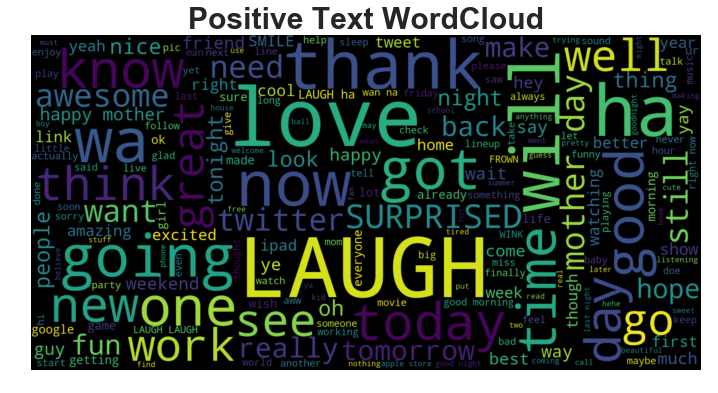

In [43]:
from wordcloud import WordCloud

pos_tweets = data[data['sentiment'] == 'positive']
pos_string = []
for tweeets in pos_tweets.cleaned:
    pos_string.append(tweeets)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud_pos = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title("Positive Text WordCloud", fontsize=30, fontweight="bold")
plt.axis("off")
plt.show()

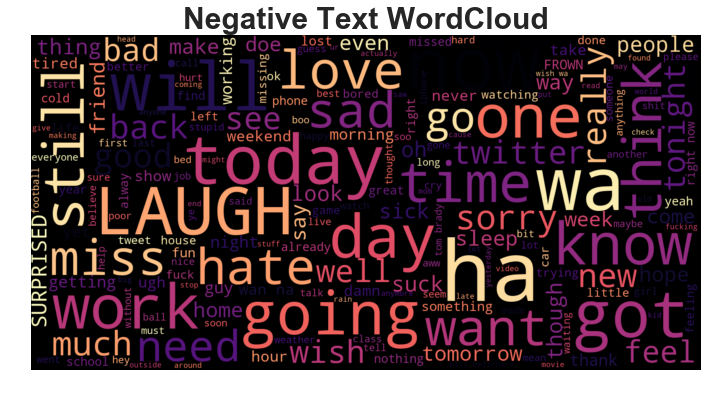

In [44]:
neg_tweets = data[data['sentiment'] == 'negative']
neg_string = []
for tweeets in neg_tweets.cleaned:
    neg_string.append(tweeets)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud_negative = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Text WordCloud", fontsize=30, fontweight="bold")
plt.axis("off")
plt.show()

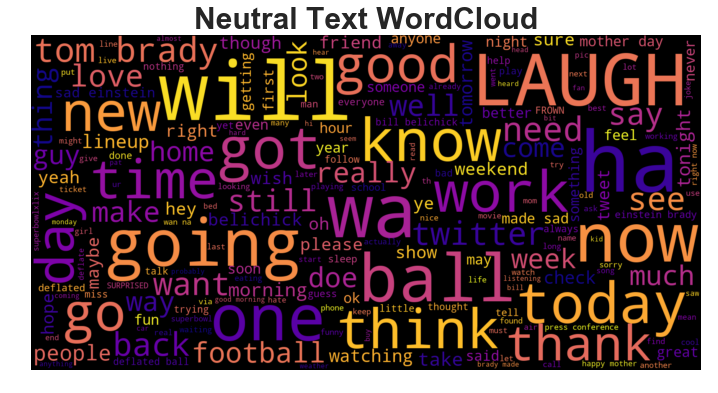

In [45]:
neu_tweets = data[data['sentiment'] == 'neutral']
neu_string = []
for tweeets in neu_tweets.cleaned:
    neu_string.append(tweeets)
neu_string = pd.Series(neu_string).str.cat(sep=' ')


wordcloud_neutral = WordCloud(width=1600, height=800, max_font_size=200,colormap='plasma').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Text WordCloud", fontsize=30, fontweight="bold")
plt.axis("off")
plt.show()

Let us do a recheck to make sure there are no blank values.

In [46]:
data.drop(data[data['cleaned'] == ""].index, inplace=True) # they are technically not null but have a white space

## Model Selection

In [47]:
from sklearn import preprocessing


print(data.groupby(['sentiment'])['text'].count())

le = preprocessing.LabelEncoder()
target = le.fit_transform(data['sentiment'])


print(np.unique(target, return_counts=True))

sentiment
negative    43353
neutral     13018
positive    43879
Name: text, dtype: int64
(array([0, 1, 2]), array([43353, 13018, 43879]))


#### TF-IDF Vectorizer
Now we are ready to use the TF-IDF vectorizer with Ngram range to get ready to create our model. We will stick to the top 50k features since keeping all of them doesn't improve performance much, but the training time is faster. We will also keep trigrams.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer


# different ngrams combinations
unigrams = (1,1)
bigrams = (1,2)
trigrams = (1,3)
ngrams = (1,4)

tfidf = TfidfVectorizer(max_features=50000, stop_words=None, ngram_range=trigrams)
tfidf_df = tfidf.fit_transform(data['cleaned'])

print("TFIDF Data Frame Shape : {}".format(tfidf_df.shape))
print("First 10 features: ", tfidf.get_feature_names()[:10])

TFIDF Data Frame Shape : (100250, 50000)
First 10 features:  ['aah', 'aahh', 'aand', 'aargh', 'aaron', 'aaron hernandez', 'aaronhernandez', 'aaw', 'aaww', 'ab']


In [49]:
data.head()

,text,sentiment,char_count,word_count,avg_word,stopwords,hashtags,tags,cleaned,pol,subjectivity,exclamation,question,ellipsis
0,@tiffanylue i know i was listenin to bad habi...,negative,92,19,4.111111,8,0,1,i know i wa listening to bad habit earlier and...,-0.35,0.583333,0,0,0
1,Layin n bed with a headache ughhhh...waitin o...,negative,60,11,5.000000,4,0,0,layin in bed with a headache ughh waitin on yo...,0.00,0.000000,0,0,0
2,Funeral ceremony...gloomy friday...,negative,35,3,11.000000,0,0,0,funeral ceremony gloomy friday,0.00,0.000000,0,0,0
3,wants to hang out with friends SOON!,positive,36,7,4.285714,3,0,0,want to hang out with friend soon,0.25,0.100000,1,0,0
4,@dannycastillo We want to trade with someone w...,neutral,86,15,4.800000,6,0,1,we want to trade with someone who ha houston t...,0.00,0.000000,0,0,0


#### Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 'tags','exclamation',
                 'question','ellipsis','pol','subjectivity']])
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = ['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 'tags','exclamation',
                 'question','ellipsis','pol','subjectivity']
data_scaled = scaled_df

In [51]:
import scipy as sp


df = sp.sparse.hstack((tfidf_df, data_scaled), format='csr')
df_columns = tfidf.get_feature_names() + data[['char_count', 'word_count','avg_word', 'stopwords', 
                                               'hashtags','tags','exclamation','question','ellipsis',
                                              'pol','subjectivity']].columns.tolist()

###  Multinomial Naive Bayes
We will be using F1-score over accuracy since we are dealing with a very imbalanced class.

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV


kfold = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)

nb = MultinomialNB()

param_grid = { "alpha" : np.arange(0.01, 10, .1) }

gs_nb = GridSearchCV(nb, param_grid, cv=kfold, scoring='f1_micro')
gs_nb.fit(df, target)
print(gs_nb.best_params_)

{'alpha': 0.51}


In [53]:
model_nb = gs_nb.best_estimator_

scores_nb = cross_val_score(model_nb, df, target, cv=kfold, scoring='f1_micro')
print(scores_nb.mean())

0.6633915308019893


###  Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
import time


model_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') # grid search parameters
model_lr.fit(df, target)

scores_lr = cross_val_score(model_lr, df, target, cv=kfold, scoring='f1_micro')

print(scores_lr.mean())

0.6739451686948337


Here we get a score that is not very impressive. It might be due to the 'neutral' class sentiment that may be affecting the results, since neutral can sometimes be subjective on the user. To make sure, let us try this model with the data only with 'positive' and 'negative' sentiments. Here we can evaluate by accuracy since the classes are more balanced.

In [55]:
xdata = data[data["sentiment"] != 'neutral']

tfidfx = TfidfVectorizer(max_features=50000, stop_words=None, ngram_range=trigrams)
tfidf_dfx = tfidfx.fit_transform(xdata['cleaned'])

dfx = sp.sparse.hstack((tfidf_dfx, xdata[['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 
                                          'tags','exclamation','question','ellipsis']].values), format='csr')
df_columnsx = tfidfx.get_feature_names() + xdata[['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 
                                                  'tags','exclamation','question','ellipsis',
                                                 'pol','subjectivity']].columns.tolist()

lex = preprocessing.LabelEncoder()
targetx = lex.fit_transform(xdata['sentiment'])

scoresx = cross_val_score(model_lr, dfx, targetx, cv=kfold, scoring='accuracy')

print(scoresx.mean())

0.7655562112311162


Yes, the neutral class is reducing the accuracy of our model. Our goal is to distinguish between all three sentiments, and not just positive and negative classes since there are many tweets that do not have any positive or negative goal. By finding out which tweets are neutral, we can discard them in our analysis. We will just have to see if we can improve our model.
<br>
###  Voting Classifier

Accuracy: 0.66339 (+/- 0.00) [Naive Bayes]
Accuracy: 0.67395 (+/- 0.00) [Logistic Regression]


/Users/cris/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/cris/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/cris/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/cris/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Accuracy: 0.67475 (+/- 0.00) [Ensemble]


/Users/cris/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


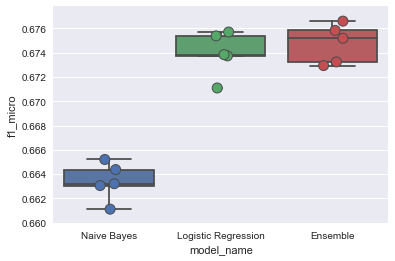

In [56]:
from sklearn.ensemble import VotingClassifier

# implement the VotingClassifier
VC = VotingClassifier(estimators=[('nb', model_nb), ('lr', model_lr)], voting='soft')

# create a df to plot the scores
VC_df = pd.DataFrame(index=range(3 * 3))

preds = []
for clf, lab in zip([model_nb, model_lr, VC], ['Naive Bayes', 'Logistic Regression', 'Ensemble']):
    model_name = lab
    scores_voting = cross_val_score(clf, df, target, cv=kfold, scoring='f1_micro') 
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores_voting.mean(), scores_voting.std(), lab))
    for fold, accuracy in enumerate(scores_voting):
        preds.append((lab, fold, accuracy))

VC_df = pd.DataFrame(preds, columns=['model_name', 'fold', 'f1_micro'])

# plot the results
sns.boxplot(x='model_name', y='f1_micro', data=VC_df)
sns.stripplot(x='model_name', y='f1_micro', data=VC_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=1)
plt.show()

The Ensemble model performed only a little better. We will stick to logistic regression is less complex and it looks to have a smaller variance in predictions.
### Keras Artificial Neural Network
Here implemented a neural network with different combinations but it failed to surpass the TF IDF logistic regression model.

In [57]:
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

seed = 69
np.random.seed(seed)
n_features = df.shape[1]
y = to_categorical(target)

custom_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=n_features))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
early_stopping_monitor = EarlyStopping(patience=3)

model.compile(optimizer=custom_adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df, y, epochs=10, batch_size=1000, validation_split=0.3, callbacks=[early_stopping_monitor])

Using TensorFlow backend.


Train on 70175 samples, validate on 30075 samples
Epoch 1/10
70175/70175 [==============================] - 75s 1ms/step - loss: 0.9369 - acc: 0.5617 - val_loss: 0.8159 - val_acc: 0.6703
Epoch 2/10
70175/70175 [==============================] - 74s 1ms/step - loss: 0.6842 - acc: 0.7148 - val_loss: 0.9757 - val_acc: 0.5619
Epoch 3/10
70175/70175 [==============================] - 74s 1ms/step - loss: 0.5050 - acc: 0.8015 - val_loss: 1.0047 - val_acc: 0.5880
Epoch 4/10
70175/70175 [==============================] - 74s 1ms/step - loss: 0.3724 - acc: 0.8619 - val_loss: 1.1701 - val_acc: 0.5772


We can see that our Keras model underperformed what we had expected.

### Text Transformations
We tried implementing Stanford's Glove and Google's Word2Vec but were having trouble since the tweets had many misspellings and slang that we did not remove. These models were not recognized these and caused errors. Here is a nice example of what Word2Vec it is capable of.
#### Word2Vec

In [58]:
from gensim.models import Word2Vec, KeyedVectors


filename = '/Users/cris/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


#### Glove

In [59]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors


glove2word2vec(glove_input_file="/Users/cris/glove.twitter.27B/glove.twitter.27B.200d.txt", word2vec_output_file="gensim_glove_vectors.txt")
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

###  Doc2Vec - Distributed Bag of Words
Here we wanted to use Doc2Vec to try mapping each document to a unique vector, as well as the words. Word2Vec and Glove were not working so this approach seemed fit. We will try applying Doc2Vec for unigrams, bigrams and trigrams.
<br>
#### Unigrams

In [60]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils


X = data['cleaned']

def Doc2Vec_unigrams(tweets, label):
    result = []
    prefix = label
    for index, tweeets in zip(tweets.index, tweets):
        result.append(LabeledSentence(tweeets.split(), [prefix + '_%s' % index]))
    return result
  
Doc2Vec_ug = Doc2Vec_unigrams(X, 'all')

In [61]:
Doc2Vec_ug[:5]

[LabeledSentence(words=['i', 'know', 'i', 'wa', 'listening', 'to', 'bad', 'habit', 'earlier', 'and', 'i', 'started', 'freakin', 'at', 'his', 'part', 'FROWN'], tags=['all_0']),
 LabeledSentence(words=['layin', 'in', 'bed', 'with', 'a', 'headache', 'ughh', 'waitin', 'on', 'your', 'call'], tags=['all_1']),
 LabeledSentence(words=['funeral', 'ceremony', 'gloomy', 'friday'], tags=['all_2']),
 LabeledSentence(words=['want', 'to', 'hang', 'out', 'with', 'friend', 'soon'], tags=['all_3']),
 LabeledSentence(words=['we', 'want', 'to', 'trade', 'with', 'someone', 'who', 'ha', 'houston', 'ticket', 'but', 'no', 'one', 'will'], tags=['all_4'])]

In [62]:
cores = multiprocessing.cpu_count() # helps speed up the process
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(Doc2Vec_ug)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(Doc2Vec_ug)]), total_examples=len(Doc2Vec_ug), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    '''function to get unigram vectors'''
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
vecs_dbow = get_vectors(model_ug_dbow, X, 100) # 100D vectors

clf_ug_dbow = LogisticRegression()
clf_ug_dbow.fit(vecs_dbow, target)

scores_ug_dbow = cross_val_score(clf_ug_dbow, vecs_dbow, target, cv=kfold, scoring='accuracy')
print(np.mean(scores_ug_dbow))

100%|██████████| 100250/100250 [00:00<00:00, 3140082.12it/s]


0.6323690474801615


#### Bigrams

In [63]:
from gensim.models.phrases import Phrases, Phraser

tokens = [text.split() for text in X]
phrases = Phrases(tokens)
bigram = Phraser(phrases)

def Doc2Vec_bigrams(tweets, label):
    '''function to create bigram DBOW'''
    result = []
    prefix = label
    for index, tweeets in zip(tweets.index, tweets):
        result.append(LabeledSentence(bigram[tweeets.split()], [prefix + '_%s' % index]))
    return result
  
Doc2Vec_bg = Doc2Vec_bigrams(X, 'all')

In [64]:
Doc2Vec_bg[:5]

[LabeledSentence(words=['i', 'know', 'i', 'wa', 'listening', 'to', 'bad_habit', 'earlier', 'and', 'i', 'started', 'freakin', 'at', 'his', 'part', 'FROWN'], tags=['all_0']),
 LabeledSentence(words=['layin', 'in', 'bed', 'with', 'a', 'headache', 'ughh', 'waitin', 'on', 'your', 'call'], tags=['all_1']),
 LabeledSentence(words=['funeral', 'ceremony', 'gloomy', 'friday'], tags=['all_2']),
 LabeledSentence(words=['want', 'to', 'hang_out', 'with', 'friend', 'soon'], tags=['all_3']),
 LabeledSentence(words=['we', 'want', 'to', 'trade', 'with', 'someone', 'who', 'ha', 'houston', 'ticket', 'but', 'no', 'one', 'will'], tags=['all_4'])]

In [ ]:
## won't run the rest, it crashes now with more input

In [ ]:
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(Doc2Vec_bg)])

for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(Doc2Vec_bg)]), total_examples=len(Doc2Vec_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha
    
vecs_dbow_bg = get_vectors(model_bg_dbow, X, 100)

clf_bg_dbow = LogisticRegression()
clf_bg_dbow.fit(vecs_dbow_bg, target)

scores_bg_dbow = cross_val_score(clf_bg_dbow, vecs_dbow_bg, X, cv=kfold, scoring='accuracy')
print(np.mean(scores_bg_dbow))
# stopped running, took forever

#### Trigrams

In [ ]:
tg_phrases = Phrases(bigram[tokens])
trigram = Phraser(tg_phrases)

def Doc2Vec_trigrams(tweets, label):
    '''function to create trigram DBOW'''
    result = []
    prefix = label
    for index, tweeets in zip(tweets.index, tweets):
        result.append(LabeledSentence(trigram[tweeets.split()], [prefix + '_%s' % index]))
    return result
  
Doc2Vec_tg = Doc2Vec_trigrams(X, 'all')

In [ ]:
Doc2Vec_tg[:5]

In [65]:
model_tg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dbow.build_vocab([x for x in tqdm(Doc2Vec_tg)])

for epoch in range(30):
    model_tg_dbow.train(utils.shuffle([x for x in tqdm(Doc2Vec_tg)]), total_examples=len(Doc2Vec_tg), epochs=1)
    model_tg_dbow.alpha -= 0.002
    model_tg_dbow.min_alpha = model_tg_dbow.alpha
    
vecs_dbow_tg = get_vectors(model_tg_dbow, X, 100)

clf_tg_dbow = LogisticRegression()
clf_tg_dbow.fit(vecs_dbow_tg, target)

scores_tg_dbow = cross_val_score(clf_tg_dbow, vecs_dbow_bg, target, cv=kfold, scoring='accuracy')
print(np.mean(scores_tg_dbow))

NameError: name 'Doc2Vec_tg' is not defined

## Pipeline
Now we will create the pipeline so we can process our streamed tweets for the model.

In [67]:
def clean_tweet_pipeline(data):
    '''pipeline to normalize text for model use'''
    
    # create tweet statistics
    tweet_stats(data)
    
    # clean text encodings
    data['cleaned'] = data['text'].apply(clean_HTML)
    
    # convert usernames to USER
    data['cleaned'] = data['cleaned'].apply(remove_usr)
    
    # remove URLs
    data['cleaned'] = data['cleaned'].apply(remove_url)
    
    # remove hashtags
    data['cleaned'] = data['cleaned'].apply(remove_hashtag) 

    # remove letters that are repated more than twice
    data['cleaned'] = data['cleaned'].apply(replace_repeat)
    
    # convert emogis
    data['cleaned'] = data['cleaned'].apply(insert_emogi)

    # decontract text
    data['cleaned'] = data['cleaned'].apply(decontract)
    
    # replace slang
    data['cleaned'] = data['cleaned'].apply(replace_slang)
    
    # add polarity and subjectivity
    data['pol'] = data['cleaned'].apply(tb_polarity)
    data['subjectivity'] = data['cleaned'].apply(tb_subjectivity)
    
    # clean puntuaction except for exclamations, questions and ellipsis
    data['cleaned'] = data['cleaned'].apply(clean_punct)

    # remove unwanted words
    data['cleaned'] = data['cleaned'].apply(lambda word: " ".join(word for word in word.split() if word not in words2remove))

    # tokenize and lemmatize with TextBlob
    data['cleaned'] = data['cleaned'].apply(tokenize_text)
    data['cleaned'] = data['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

    # clean punctuation part two
    data['exclamation'] = data.cleaned.str.contains(r'EXCLAMATION')
    data['question'] = data.cleaned.str.contains(r'QUESTION')
    data['ellipsis'] = data.cleaned.str.contains(r'ELLIPSIS')

    data['exclamation'] = data['exclamation'].astype(int)
    data['question'] = data['question'].astype(int)
    data['ellipsis'] = data['ellipsis'].astype(int)
    
    data['cleaned'] = data['cleaned'].apply(clean_punct_v2)
    
    # clean extra spaces
    data.drop(data[data['cleaned'] == ""].index, inplace=True)
    
    ## TF IDF vectorizer
    tfidf_tweets = tfidf.transform(data['cleaned'])
    
    ## MinMax Scaler
    scaled_tweets = scaler.transform(data[['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 'tags','exclamation',
                 'question','ellipsis','pol','subjectivity']])
    scaled_df_tweets = pd.DataFrame(scaled_tweets)
    scaled_df_tweets.columns = ['char_count', 'word_count','avg_word', 'stopwords', 'hashtags', 'tags','exclamation',
                 'question','ellipsis','pol','subjectivity']
    tweets_scaled = scaled_df_tweets
    
    ## Merget TF IDF and Data Set
    df_tweets = sp.sparse.hstack((tfidf_tweets, tweets_scaled), format='csr')
    df_tweets_columns = tfidf.get_feature_names() + tweets_scaled[['char_count', 'word_count','avg_word', 'stopwords', 
                                               'hashtags','tags','exclamation','question','ellipsis',
                                              'pol','subjectivity']].columns.tolist()
    
    ### Prediction
    prediction = model_lr.predict(df_tweets)
    data['sentiment'] = prediction

## Streamed Tweets Tranformation and Prediction
Now let's load our streamed tweets.

In [68]:
tweets = pd.read_excel('tweetsSpain_withoutRTs.xlsx', header=None, names=['text', 'date'], parse_dates=False)
tweets['date'] =  pd.to_datetime(tweets['date'], format='%c')
tweets = tweets.set_index('date')

tweets.head()

,text
date,
2018-06-15 17:24:14,Poll: Who wins today's World Cup game?\nPortu...
2018-06-15 17:24:15,hope Cris goes OFF https://t.co/mIKuLegUTj'
2018-06-15 17:24:17,so my country's gonna play today @ world cup.....
2018-06-15 17:24:18,World Cup 2018: How to Watch Portugal-Spain On...
2018-06-15 17:24:18,Lets get this World Cup madness going Spain P...


In [69]:
start = time.clock()

clean_tweet_pipeline(tweets)

print("Pipeline Speed : ", time.clock() - start)

Pipeline Speed :  20.934192999999823


In [70]:
tweets.head()

,text,char_count,word_count,avg_word,stopwords,hashtags,tags,cleaned,pol,subjectivity,exclamation,question,ellipsis,sentiment
date,,,,,,,,,,,,,,
2018-06-15 17:24:14,Poll: Who wins today's World Cup game?\nPortu...,121,16,7.066667,1,6,0,poll who win today world cup game nportugal or...,0.3000,0.2000,0,1,0,0
2018-06-15 17:24:15,hope Cris goes OFF https://t.co/mIKuLegUTj',43,5,7.800000,0,0,0,hope cris go off,0.0000,0.0000,0,0,0,0
2018-06-15 17:24:17,so my country's gonna play today @ world cup.....,116,21,4.800000,3,0,1,so my country going to play today world cup i ...,0.3375,0.5125,0,0,0,2
2018-06-15 17:24:18,World Cup 2018: How to Watch Portugal-Spain On...,93,11,7.545455,2,0,0,world cup how to watch portugal spain online f...,0.0000,0.0000,0,0,0,2
2018-06-15 17:24:18,Lets get this World Cup madness going Spain P...,87,15,5.615385,1,1,0,let get this world cup madness going spain por...,0.0000,0.0000,1,0,0,2


sentiment
negative    5148
neutral      190
positive    8456
Name: sentiment, dtype: int64
----------------------------------
Total tweets streamed : 13794


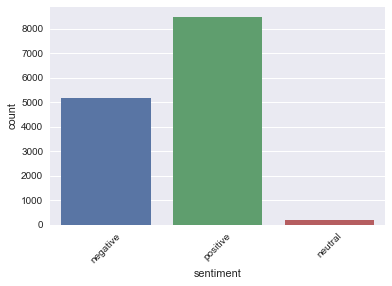

In [71]:
tweets['sentiment'].replace(2,'positive',inplace=True)
tweets['sentiment'].replace(1,'neutral',inplace=True)
tweets['sentiment'].replace(0,'negative',inplace=True)

check_sents(tweets)
print("----------------------------------")
print("Total tweets streamed : {}".format(tweets.shape[0]))

So we can see that most of the tweets were predicted as positive, followed by negative and a very few neutral tweets. This doesn't sound correct, so let us investigate.

In [72]:
tweets[['cleaned', 'pol', 'sentiment']].head(25)

,cleaned,pol,sentiment
date,,,
2018-06-15 17:24:14,poll who win today world cup game nportugal or...,0.300000,negative
2018-06-15 17:24:15,hope cris go off,0.000000,negative
2018-06-15 17:24:17,so my country going to play today world cup i ...,0.337500,positive
2018-06-15 17:24:18,world cup how to watch portugal spain online f...,0.000000,positive
2018-06-15 17:24:18,let get this world cup madness going spain por...,0.000000,positive
2018-06-15 17:24:19,all the factz on portugal v spain in the world...,0.000000,positive
2018-06-15 17:24:22,fifa world cup n nportugal v spain line ups nb...,0.000000,positive
2018-06-15 17:24:24,the nadals seem like a nice bunch,0.600000,positive
2018-06-15 17:24:25,what a boring day for the world cup hopefully ...,-1.000000,negative


We can see that many of the tweets are actually neutral and pretty useless. After visually expecting many of the tweets, a majority seem to be just mentioning the match or very neutral. There seems to be some contradiction between our predictions and the TextBlob sentiment polarity. The TextBlob polarities seem to be a little more conservative towards neutral classes, while our predictor is more aggressive. It is not perfect plan, but lets set a threshold where both polarities and predictions match. We will lose some information, but it is better to get rid of the non-informative tweets.

In [73]:
positives = tweets[(tweets['pol'] > .2) & (tweets['sentiment'] == 'positive')] # we will set the threshold low and inspect
negatives = tweets[(tweets['pol'] < -.2) & (tweets['sentiment'] == 'negative')]
tweets = pd.concat([positives, negatives], ignore_index=False)
tweets = tweets.sort_index()

sentiment
negative     660
positive    2955
Name: sentiment, dtype: int64
----------------------------------
Tweets leftover : 3615


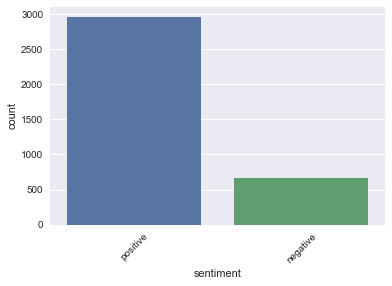

In [74]:
check_sents(tweets)
print("----------------------------------")
print("Tweets leftover : {}".format(tweets.shape[0]))

Now we can see that we got a rid of a lot of the noisy tweets from 13,794 to 3,770.

In [75]:
tweets[['cleaned', 'pol', 'sentiment']].head(25)

,cleaned,pol,sentiment
date,,,
2018-06-15 17:24:17,so my country going to play today world cup i ...,0.337500,positive
2018-06-15 17:24:24,the nadals seem like a nice bunch,0.600000,positive
2018-06-15 17:24:25,what a boring day for the world cup hopefully ...,-1.000000,negative
2018-06-15 17:24:37,twt lopetegui all the best in this world cup f...,1.000000,positive
2018-06-15 17:24:40,the european champion look to add the world cu...,0.250000,positive
2018-06-15 17:24:48,should be one of the best match of world cup,1.000000,positive
2018-06-15 17:25:04,world cup spain outright winner world cup get ...,0.312121,positive
2018-06-15 17:25:04,world cup spain outright winner world cup get ...,0.312121,positive
2018-06-15 17:25:05,world cup spain outright winner world cup get ...,0.312121,positive


Not perfect, but looks a lot better. Let us just keep this threshold and start our analysis.

<h1><center>Spain vs. Portugal (15 June 2018)</center></h1>
<img src="https://mkbet247.com/wp-content/uploads/2018/06/world-cup-2018-cristiano-ronaldo-scores-hat-trick-as-portugal-and-spain-draw-3-3.jpg">
<br>
<center><h3>List of Goals:</h3>
<br>
<b>18:04 :</b> Cristiano Ronaldo (Portugal)
<br>
<b>18:23 :</b> Diego Costa (Spain)
<br>
<b>18:44 :</b> Cristiano Ronaldo (Portugal)
<br>
<b>19:12 :</b> Diego Costa (Spain)
<br>
<b>19:15 :</b> Nacho (Spain)
<br>
<b>19:45 :</b> Cristiano Ronaldo (Portugal)</center>

In [76]:
def positive_percentage(data): 
    '''Prints the percentage of positive tweets over both positive and negative classes'''
    print("Positive Tweets : %.2f \n" % (len(data[data == 'positive']) / len(data)))

In [77]:
print("----- Before Match -----")
before_match = tweets.between_time('17:30', '18:00').loc[:,'sentiment']
before_match.value_counts()
positive_percentage(before_match)

print("----- First Goal -----")
first_goal = tweets.between_time('18:00', '18:04').loc[:,'sentiment']
first_goal.value_counts()
positive_percentage(first_goal)

print("----- Between Goals -----")
between_1_2 = tweets.between_time('18:04', '18:09').loc[:,'sentiment']
between_1_2.value_counts()
positive_percentage(between_1_2)

print("----- Second Goal -----")
second_goal = tweets.between_time('18:18', '18:23').loc[:,'sentiment']
second_goal.value_counts()
positive_percentage(second_goal)

print("----- Between Goals -----")
between_2_3 = tweets.between_time('18:23', '18:39').loc[:,'sentiment']
between_2_3.value_counts()
positive_percentage(between_2_3)

print("----- Third Goal -----")
third_goal = tweets.between_time('18:39', '18:44').loc[:,'sentiment']
third_goal.value_counts()
positive_percentage(third_goal)

print("----- Between Goals -----")
between_3_4 = tweets.between_time('18:44', '19:07').loc[:,'sentiment']
between_3_4.value_counts()
positive_percentage(between_3_4)

print("----- Fourth Goal -----")
fourth_goal = tweets.between_time('19:07', '19:12').loc[:,'sentiment']
fourth_goal.value_counts()
positive_percentage(fourth_goal)

print("----- Fifth Goal -----")
fifth_goal = tweets.between_time('19:12', '19:15').loc[:,'sentiment']
fifth_goal.value_counts()
positive_percentage(fifth_goal)

print("----- Between Goals -----")
between_5_6 = tweets.between_time('19:15', '19:40').loc[:,'sentiment']
between_5_6.value_counts()
positive_percentage(between_5_6)

print("----- Sixth Goal -----")
sixth_goal = tweets.between_time('19:40', '19:45').loc[:,'sentiment']
sixth_goal.value_counts()
positive_percentage(sixth_goal)

----- Before Match -----
Positive Tweets : 0.81 

----- First Goal -----
Positive Tweets : 0.87 

----- Between Goals -----
Positive Tweets : 0.78 

----- Second Goal -----
Positive Tweets : 0.85 

----- Between Goals -----
Positive Tweets : 0.79 

----- Third Goal -----
Positive Tweets : 0.76 

----- Between Goals -----
Positive Tweets : 0.79 

----- Fourth Goal -----
Positive Tweets : 0.75 

----- Fifth Goal -----
Positive Tweets : 0.85 

----- Between Goals -----
Positive Tweets : 0.84 

----- Sixth Goal -----
Positive Tweets : 0.88 



In [78]:
p = tweets[tweets['sentiment'] == 'positive']
pmin = p.resample('T')['sentiment'].count()
totmin = tweets.resample('T')['sentiment'].count()
ppermin = pmin/totmin

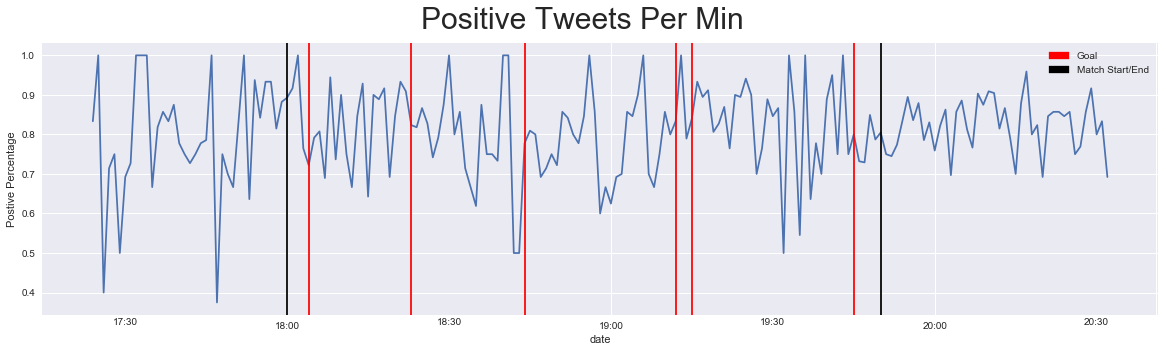

In [79]:
import matplotlib.patches as mpatches


ppermin.plot(figsize=(20,5))

goals = [
    (pd.to_datetime('2018-06-15 18:00:00'), 'black'),
    (pd.to_datetime('2018-06-15 18:04:00'), 'r'),
    (pd.to_datetime('2018-06-15 18:23:00'), 'r'),
    (pd.to_datetime('2018-06-15 18:44:00'), 'r'),
    (pd.to_datetime('2018-06-15 19:12:00'), 'r'),
    (pd.to_datetime('2018-06-15 19:15:00'), 'r'),
    (pd.to_datetime('2018-06-15 19:45:00'), 'r'),
    (pd.to_datetime('2018-06-15 19:50:00'), 'black') ]

plt.gca()
plt.suptitle('Positive Tweets Per Min', fontsize=30)
plt.ylabel('Postive Percentage')

goal = mpatches.Patch(color='red', label='Goal')
be = mpatches.Patch(color='black', label='Match Start/End')
plt.legend(handles=[goal,be])

for date_point, clr in goals:
    plt.axvline(x=date_point, color=clr)
    
plt.show()

We can see that there could be a small correlation between the percentage of positive tweets to goals. The percentage increases a little before a goal is made. The time between goals seems to be stationary. Obviously this is a fun example and we can also see that the overall attitude of the game was positive. So without even watching the match, we can see that most people enjoyed the match.

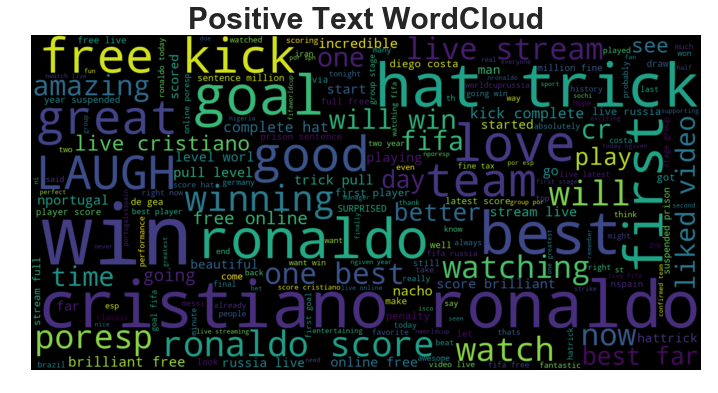

In [80]:
from wordcloud import STOPWORDS

sw= set(STOPWORDS)
new_words = ['worldcup', 'world', 'cup', 'spain', 'portugal', 'v', 'ha', 'wa','soccer','game', 'match', 'hd','football']
new_sw = sw.union(new_words)

pos_string = []
for tweeets in p.cleaned:
    pos_string.append(tweeets)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud_pos = WordCloud(width=1600, height=800,max_font_size=200, stopwords=new_sw).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title("Positive Text WordCloud", fontsize=30, fontweight="bold")
plt.axis("off")
plt.show()

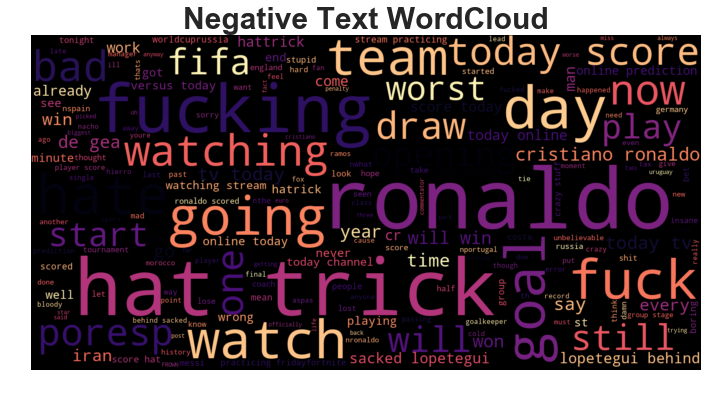

In [81]:
n = tweets[tweets['sentiment'] == 'negative']
neg_string = []
for tweeets in n.cleaned:
    neg_string.append(tweeets)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud_negative = WordCloud(width=1600, height=800,max_font_size=200,
                               colormap='magma',stopwords=new_sw).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Text WordCloud", fontsize=30, fontweight="bold")
plt.axis("off")
plt.show()

In [82]:
tweets['cleaned'] = tweets['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_sw)]))

The WordCloud isn't too helpful since a majority of the tweets mentioned words like 'hat trick', 'soccer', 'cristiano ronaldo' and others.

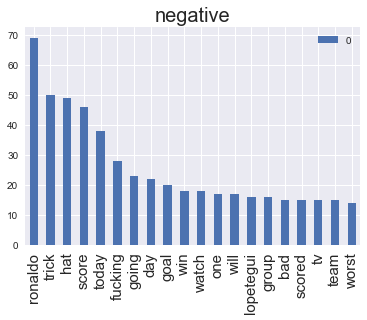

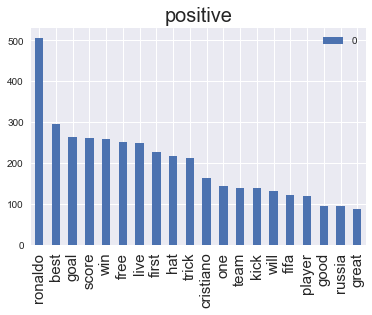

In [83]:
sentiment_word_analysis(tweets, 'cleaned')

## Conclusion
So we didn't find out our end goal of seeing if fans tweets can help predict if their teams can win a football match due to certain limitations including: lack of good neutral tweet data to train the model, limitations with the Tweepy API and the quality of tweets streamed. But we did find out that there could be a small correlation between the percentage of positive tweets and the scoring of the match. Also, we are able to analyze the sentiment of the match without even watching it. We know that the Spain vs. Portugal World Cup match was very exciting and had a positive feeling from the fans.